In [2]:
import networkx as nx
import os
import sys
from matplotlib import pyplot, patches
import h5py as h5
import numpy as np
def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[]):
    """
    - G is a netorkx graph
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
    fig = pyplot.figure(figsize=(5, 5)) # in inches
    pyplot.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")
    
    # The rest is just if you have sorted nodes by a partition and want to
    # highlight the module boundaries
    assert len(partitions) == len(colors)
    ax = pyplot.gca()
    for partition, color in zip(partitions, colors):
        current_idx = 0
        for module in partition:
            ax.add_patch(patches.Rectangle((current_idx, current_idx),
                                          len(module), # Width
                                          len(module), # Height
                                          facecolor="none",
                                          edgecolor=color,
                                          linewidth="1"))
            current_idx += len(module)

In [3]:
filenames = []
path = ""
listFile = '/Users/pascal/Coding/uni/Masterarbeit/testing_list.txt'
path = os.path.dirname(os.path.abspath(listFile))

In [4]:
with open(listFile) as f:
    filenames = f.readlines()

In [6]:
tradeMatriceList = []
ivar =  0
alltradeTimes = []
graphs = []
for h5file in filenames:
    f = h5.File((path+"/"+h5file).strip())
    ivar += 1
    try:
        h5tradeTimes = f['BVD_Trade_Times']
        tradeTimes = h5tradeTimes[:].astype(int)
        for time in tradeTimes:
            alltradeTimes.append(time)
            dataSetName = "Trades_t" + str(time)
            h5Matrix = f[dataSetName]
            intMatrix = h5Matrix[:,:].astype(int)
            tradeMatriceList.append(intMatrix)
            graphs.append(nx.from_numpy_matrix(intMatrix))
    except Exception:
        pass
    

In [7]:
len(tradeMatriceList)

4285

In [8]:
len(alltradeTimes)

4285

In [9]:
draw_adjacency_matrix(graphs[9])

In [ ]:
matArr = np.array(tradeMatriceList)
matsum = np.sum(matArr, axis=0)
fullGraph = nx.from_numpy_matrix(matsum)
draw_adjacency_matrix(fullGraph)
pyplot.show()

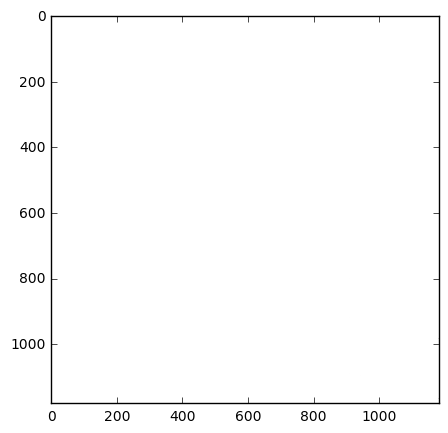

[(792, 1180),
 (800, 910),
 (828, 1180),
 (849, 910),
 (868, 910),
 (907, 1180),
 (910, 1089),
 (910, 1030),
 (910, 919),
 (910, 1048),
 (943, 1094),
 (950, 1157),
 (977, 1162),
 (983, 1180),
 (1038, 1180),
 (1130, 1180),
 (1163, 1180),
 (1165, 1180)]

{0: {},
 1: {},
 2: {},
 3: {},
 4: {},
 5: {},
 6: {},
 7: {},
 8: {},
 9: {},
 10: {},
 11: {},
 12: {},
 13: {},
 14: {},
 15: {},
 16: {},
 17: {},
 18: {},
 19: {},
 20: {},
 21: {},
 22: {},
 23: {},
 24: {},
 25: {},
 26: {},
 27: {},
 28: {},
 29: {},
 30: {},
 31: {},
 32: {},
 33: {},
 34: {},
 35: {},
 36: {},
 37: {},
 38: {},
 39: {},
 40: {},
 41: {},
 42: {},
 43: {},
 44: {},
 45: {},
 46: {},
 47: {},
 48: {},
 49: {},
 50: {},
 51: {},
 52: {},
 53: {},
 54: {},
 55: {},
 56: {},
 57: {},
 58: {},
 59: {},
 60: {},
 61: {},
 62: {},
 63: {},
 64: {},
 65: {},
 66: {},
 67: {},
 68: {},
 69: {},
 70: {},
 71: {},
 72: {},
 73: {},
 74: {},
 75: {},
 76: {},
 77: {},
 78: {},
 79: {},
 80: {},
 81: {},
 82: {},
 83: {},
 84: {},
 85: {},
 86: {},
 87: {},
 88: {},
 89: {},
 90: {},
 91: {},
 92: {},
 93: {},
 94: {},
 95: {},
 96: {},
 97: {},
 98: {},
 99: {},
 100: {},
 101: {},
 102: {},
 103: {},
 104: {},
 105: {},
 106: {},
 107: {},
 108: {},
 109: {},
 110: {},


AttributeError: 'dict' object has no attribute 'nodes'